In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
image = cv2.imread('img2.jpeg')

# Deep copy for results:
imageCopy = image.copy()

# Convert BGR to grayscale:
grayImage = cv2.cvtColor(imageCopy, cv2.COLOR_BGR2GRAY)

# Threshold via Otsu:
_, binaryImage = cv2.threshold(grayImage, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


In [16]:
# Get edges:
cannyImage = cv2.Canny(binaryImage, threshold1=120, threshold2=255, edges=1)

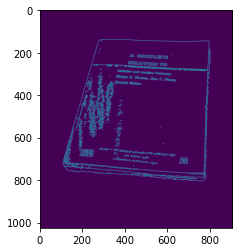

In [17]:
plt.imshow(cannyImage)

In [18]:
# Find the EXTERNAL contours on the binary image:
contours, hierarchy = cv2.findContours(cannyImage, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Store the corners:
cornerList = []

# Look for the outer bounding boxes (no children):
for i, c in enumerate(contours):

    # Approximate the contour to a polygon:
    contoursPoly = cv2.approxPolyDP(c, 3, True)

    # Convert the polygon to a bounding rectangle:
    boundRect = cv2.boundingRect(contoursPoly)

    # Get the bounding rect's data:
    rectX = boundRect[0]
    rectY = boundRect[1]
    rectWidth = boundRect[2]
    rectHeight = boundRect[3]

    # Estimate the bounding rect area:
    rectArea = rectWidth * rectHeight

    # Set a min area threshold
    minArea = 100000

# Filter blobs by area:
if rectArea > minArea:

    # Get the convex hull for the target contour:
    hull = cv2.convexHull(c)
    # (Optional) Draw the hull:
    color = (0, 0, 255)
    cv2.polylines(imageCopy, [hull], True, color, 2)

    # Create image for good features to track:
    (height, width) = cannyImage.shape[:2]
    # Black image same size as original input:
    hullImg = np.zeros((height, width), dtype =np.uint8)

    # Draw the points:
    cv2.drawContours(hullImg, [hull], 0, 255, 2)
    cv2.imshow("hullImg", hullImg)
    cv2.waitKey(0)

In [19]:
# Set the corner detection:
maxCorners = 4
qualityLevel = 0.01
minDistance = int(max(height, width) / maxCorners)

# Get the corners:
corners = cv2.goodFeaturesToTrack(hullImg, maxCorners, qualityLevel, minDistance)
corners = np.int0(corners)

# Loop through the corner array and store/draw the corners:
for c in corners:

    # Flat the array of corner points:
    (x, y) = c.ravel()
    # Store the corner point in the list:
    cornerList.append((x,y))

    # (Optional) Draw the corner points:
    cv2.circle(imageCopy, (x, y), 5, 255, 5)
    cv2.imshow("Corners", imageCopy)
    cv2.waitKey(0)

# print("points of corners is: ", corners)
destinationPoints = np.int0([[0,0], [width,0], [0,height], [width,height]])

In [21]:
# print(destinationPoints)
sourcePoints = []
for i in range(4):
    sourcePoints.append(corners[i][0])
    
sourcePoints = np.int0(sourcePoints)

print(sourcePoints)

[[794 148]
 [110 710]
 [772 763]
 [274 144]]


In [63]:
M=cv2.getPerspectiveTransform(sourcePoints,destinationPoints)
dst=cv2.warpPerspective(imageCopy,M,(w,h))
image=cv2.cvtColor(dst,cv2.COLOR_BGR2GRAY)
image = cv2.resize(image,(w,h),interpolation = cv2.INTER_AREA)
cv2.imshow('OUTPUT',image)
cv2.imwrite("output.png", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\imgwarp.cpp:3157: error: (-215:Assertion failed) src.checkVector(2, CV_32F) == 4 && dst.checkVector(2, CV_32F) == 4 in function 'cv::getPerspectiveTransform'
